In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import glob

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/long_run/*feb18/SalishSea_1d_201802[0-3][0-9]_201802[0-3][0-9]_biol_T.nc'
file_list = glob.glob(file_pattern)

new_diatoms = xr.open_mfdataset(file_list, data_vars=['diatoms'])  
new_nitrate = xr.open_mfdataset(file_list, data_vars=['nitrate']) 
new_silicon = xr.open_mfdataset(file_list, data_vars=['silicon'])  
new_ammonium = xr.open_mfdataset(file_list, data_vars=['ammonium'])

In [5]:
file_pattern_base = '/results2/SalishSea/nowcast-green.202111/*feb18/SalishSea_1d_201802[0-3][0-9]_201802[0-3][0-9]_biol_T.nc'
file_list_base = glob.glob(file_pattern_base)

base_diatoms = xr.open_mfdataset(file_list_base, data_vars=['diatoms'])  
base_nitrate = xr.open_mfdataset(file_list_base, data_vars=['nitrate'])
base_silicon = xr.open_mfdataset(file_list_base, data_vars=['silicon'])  
base_ammonium = xr.open_mfdataset(file_list_base, data_vars=['ammonium'])

In [6]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

    axs[0].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[1].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[2].scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

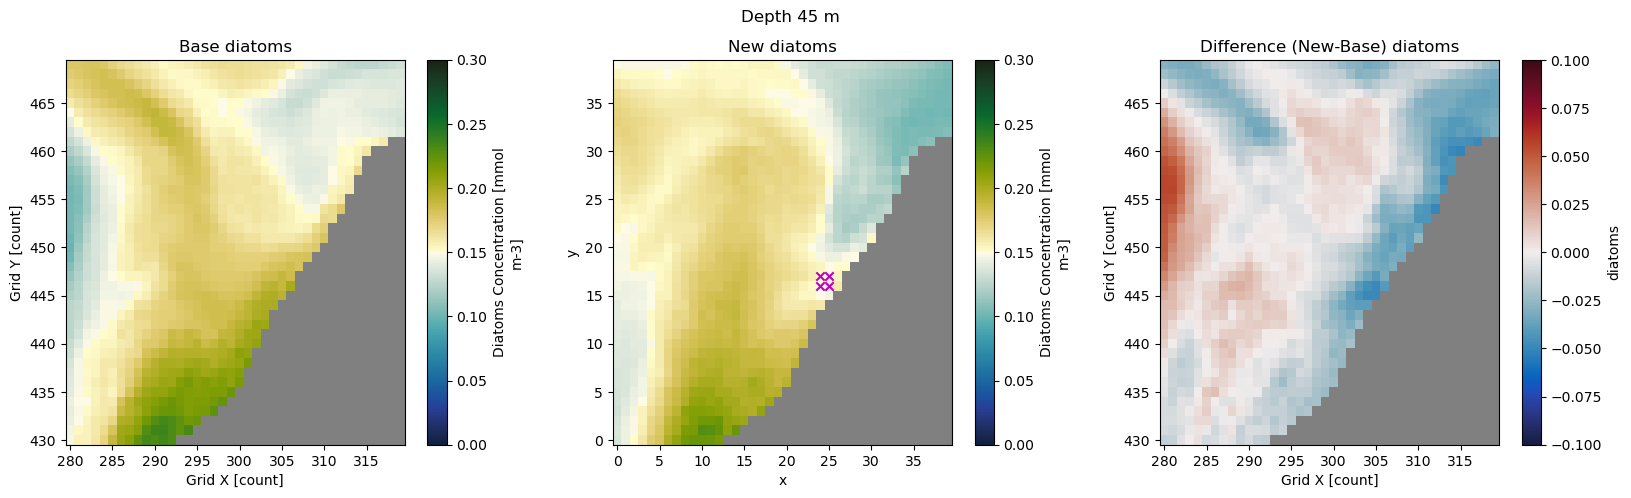

In [33]:
planview(base_diatoms, new_diatoms, 'diatoms', 27, 23 , cm_delta, 0.3, 0, 0.1)

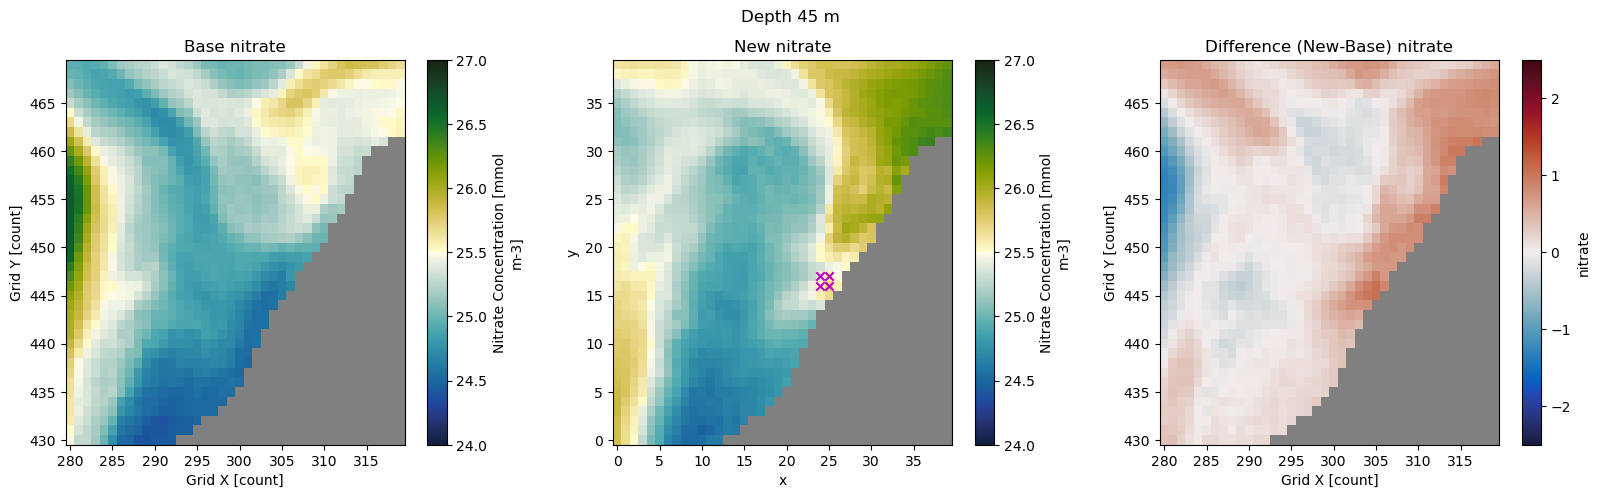

In [37]:
planview(base_nitrate, new_nitrate, 'nitrate', 27, 23 , cm_delta, 27, 24, 2.5)

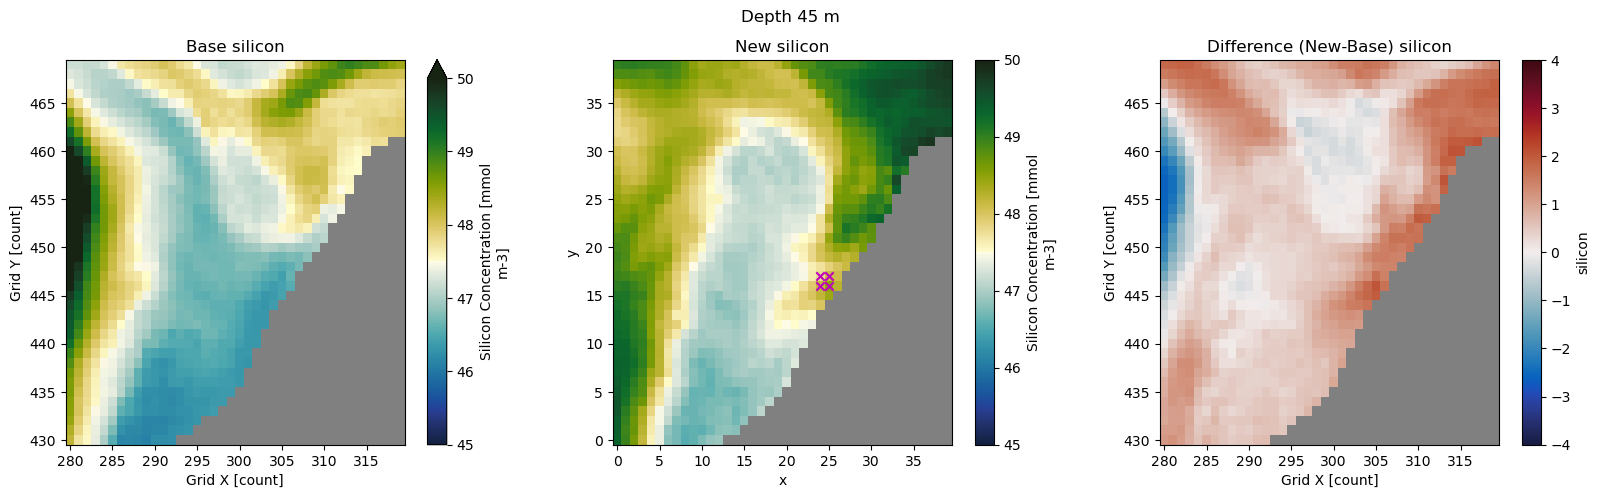

In [43]:
planview(base_silicon, new_silicon, 'silicon', 27, 23 , cm_delta, 50, 45, 4)

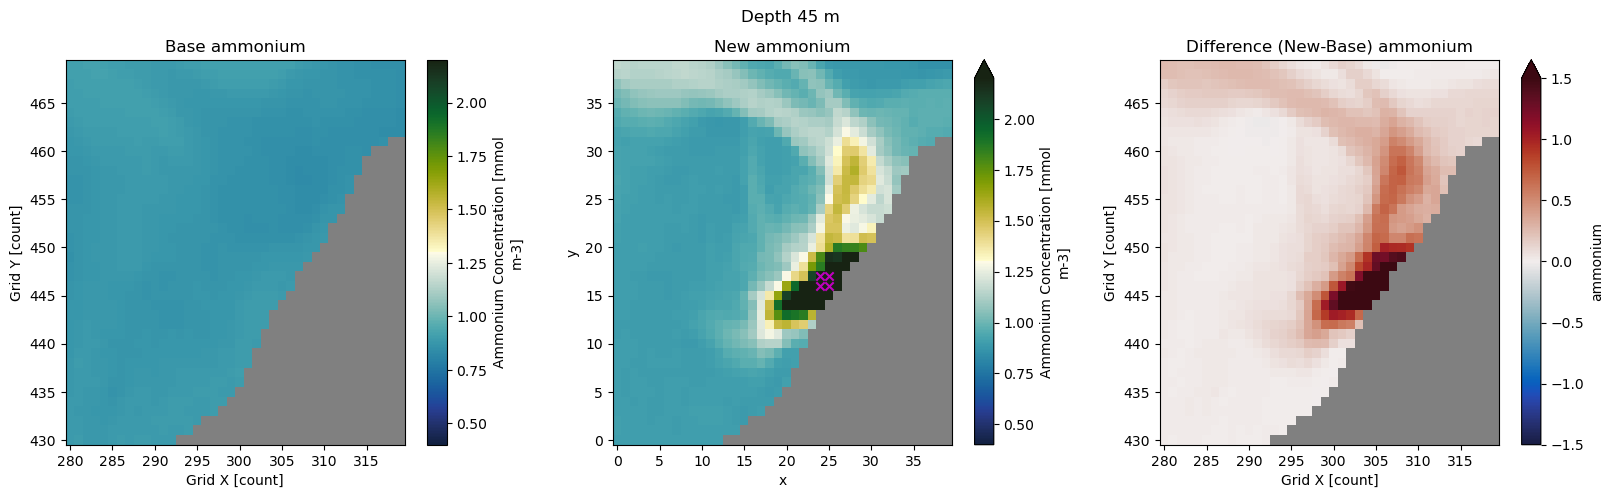

In [47]:
planview(base_ammonium, new_ammonium, 'ammonium', 27, 23 , cm_delta, 2.2, 0.4, 1.5)

In [11]:
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')


    fig.suptitle(f'Vertical view at y = {dep}')

    if dep == 446:
     axs[0].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 98, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 76, marker = 'x', color = 'g')
    else:
     axs[0].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 121, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 98, marker = 'x', color = 'g')

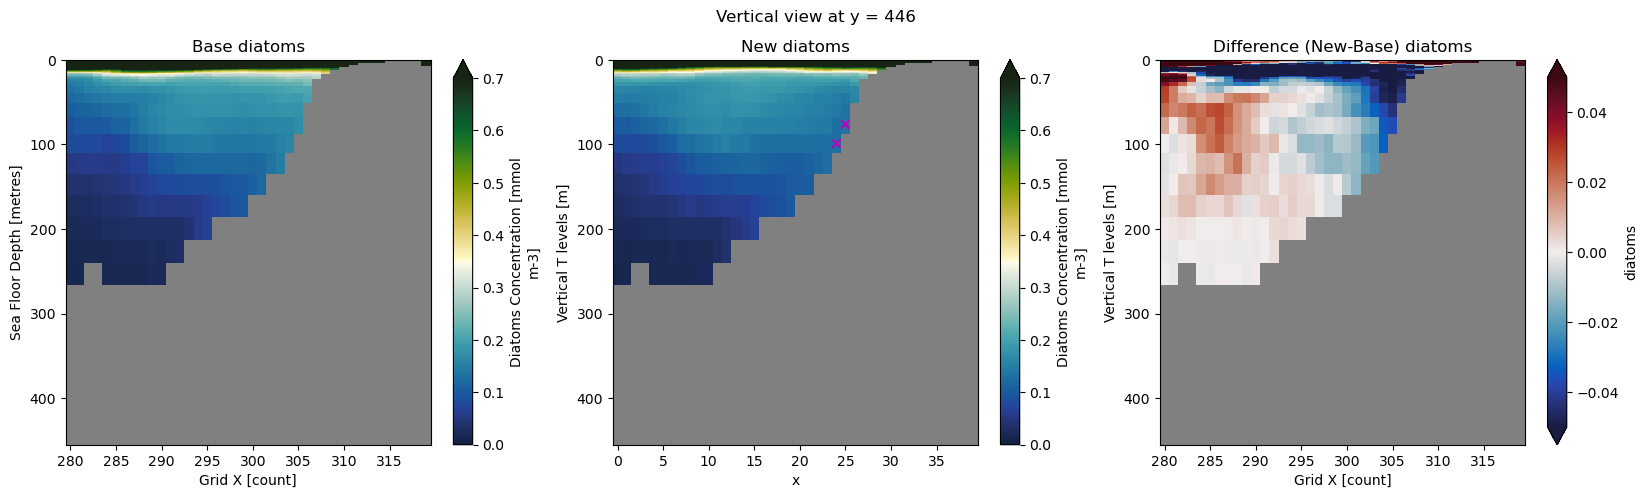

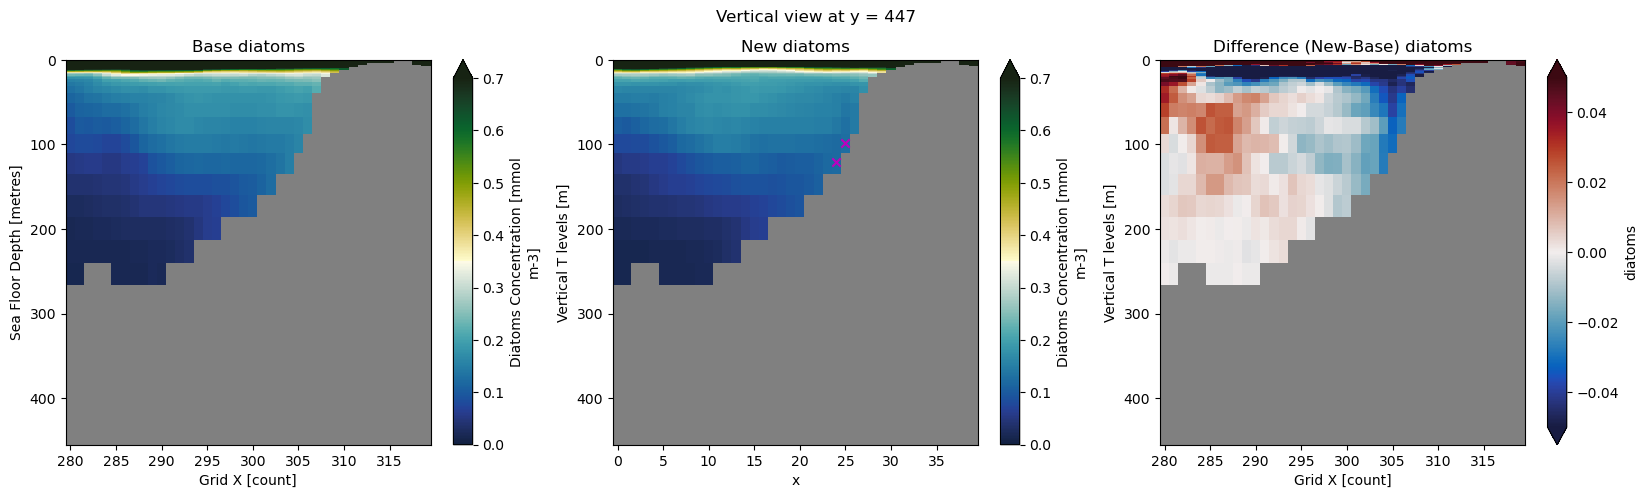

In [12]:
verticalview(base_diatoms, new_diatoms, 'diatoms', 27, 446, cm_delta, 0.7, 0, 0.05)
verticalview(base_diatoms, new_diatoms, 'diatoms', 27, 447, cm_delta, 0.7, 0, 0.05)

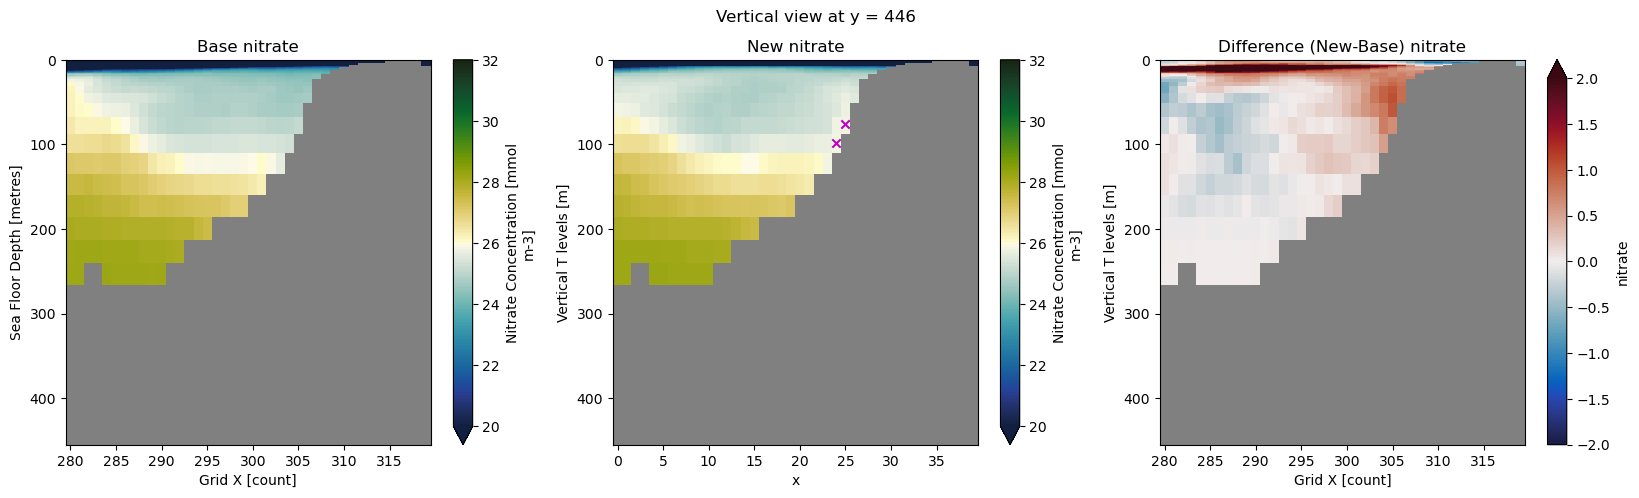

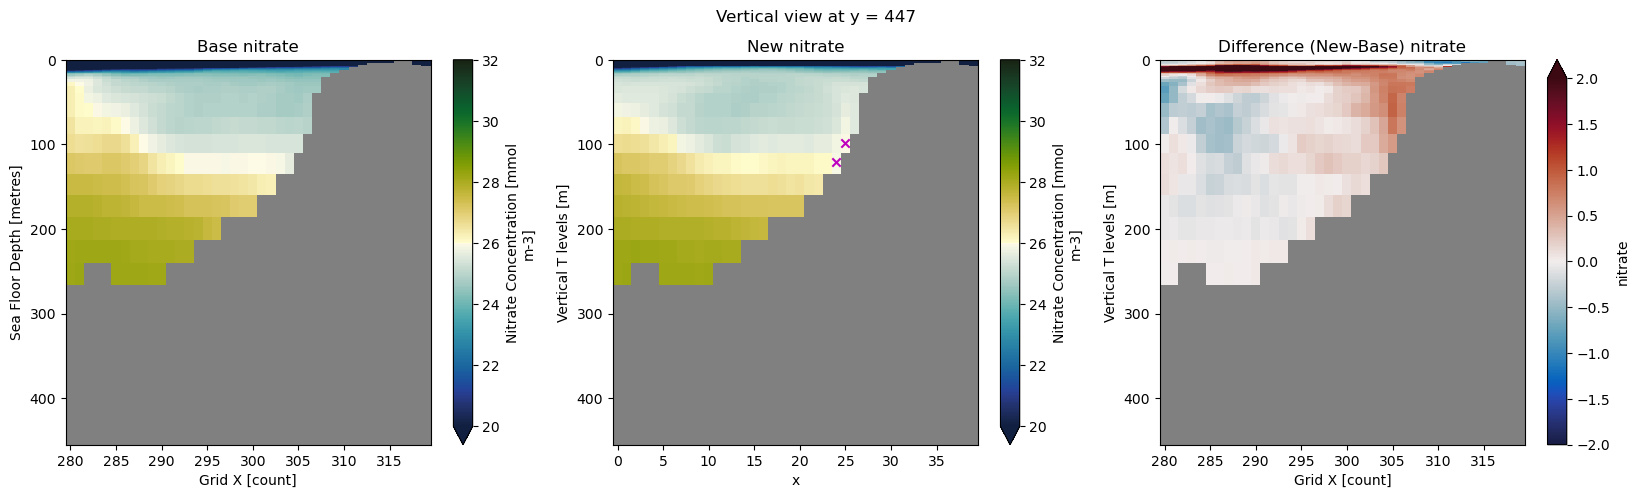

In [49]:
verticalview(base_nitrate, new_nitrate, 'nitrate', 27, 446, cm_delta, 32, 20, 2)
verticalview(base_nitrate, new_nitrate, 'nitrate', 27, 447, cm_delta, 32, 20, 2)

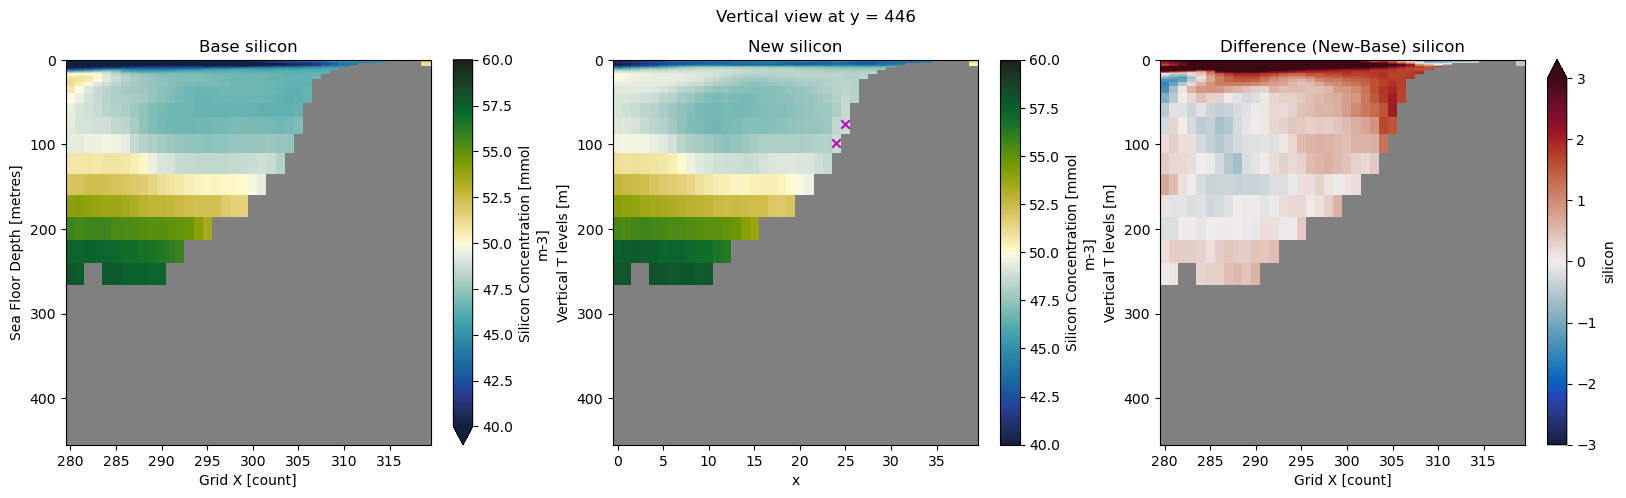

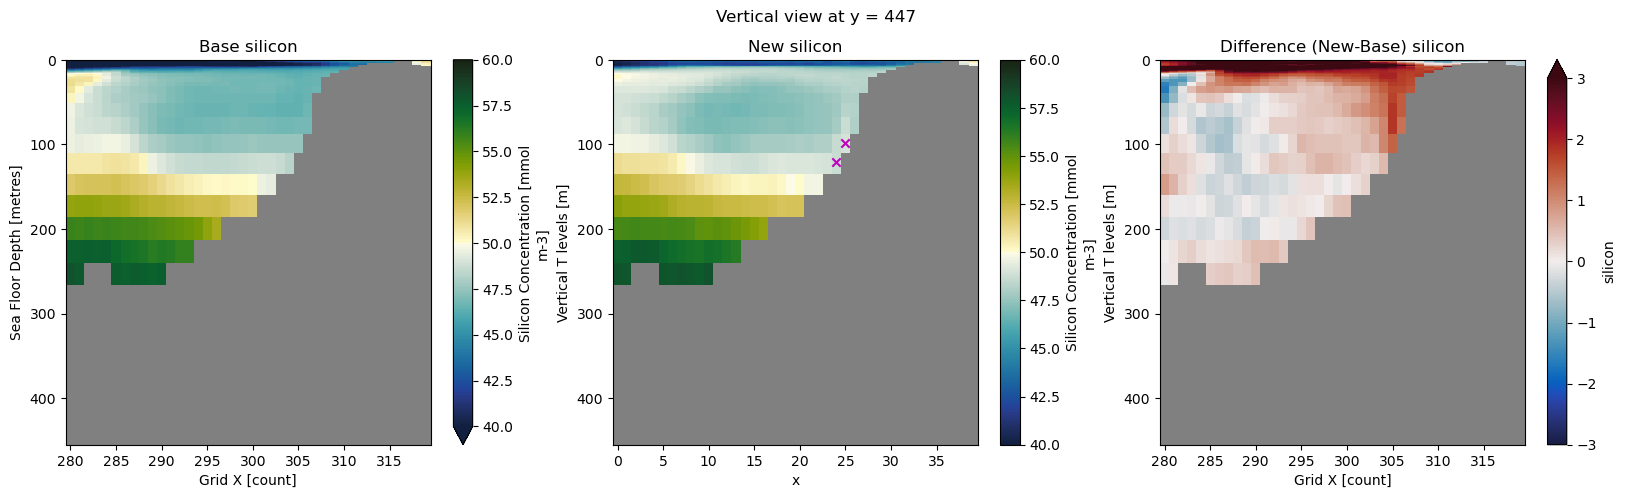

In [48]:
verticalview(base_silicon, new_silicon, 'silicon', 27, 446, cm_delta, 60, 40, 3)
verticalview(base_silicon, new_silicon, 'silicon', 27, 447, cm_delta, 60, 40, 3)

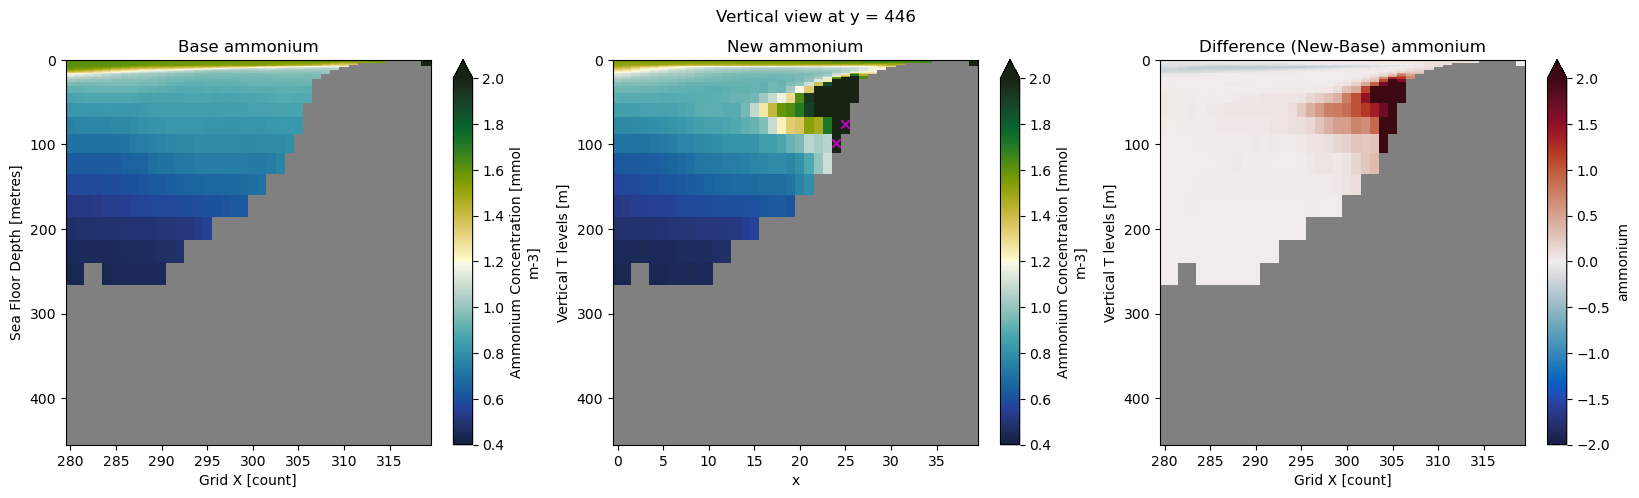

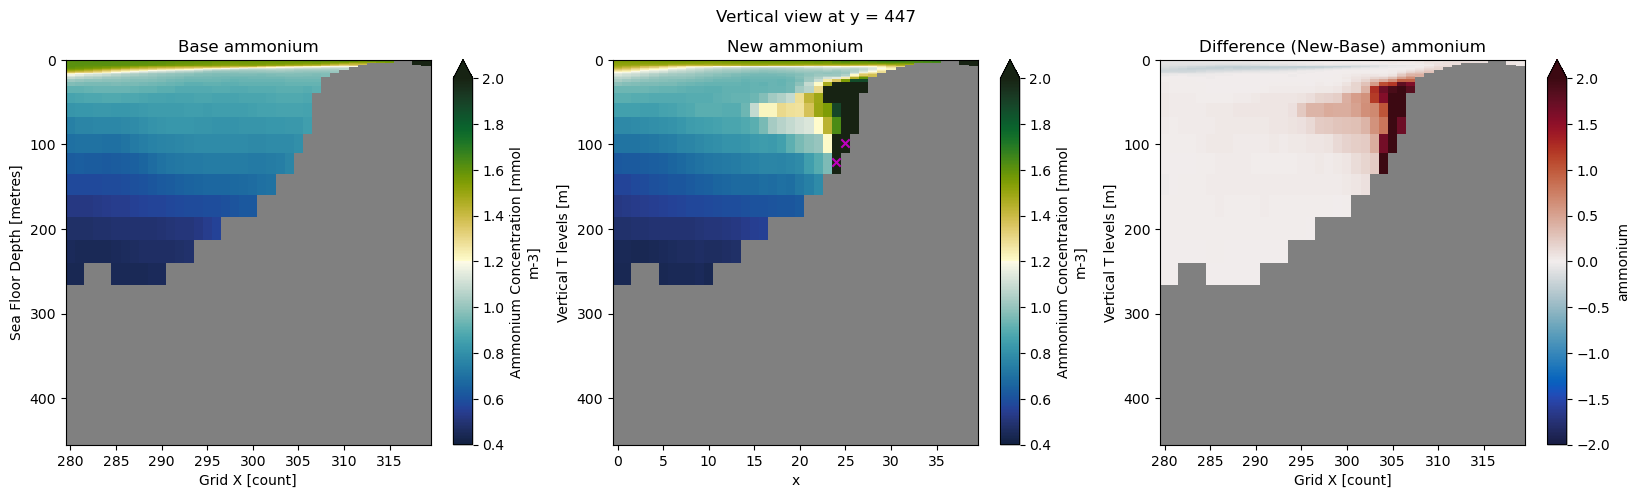

In [50]:
verticalview(base_ammonium, new_ammonium, 'ammonium', 27, 446 , cm_delta, 2, 0.4, 2)
verticalview(base_ammonium, new_ammonium, 'ammonium', 27, 447 , cm_delta, 2, 0.4, 2)

In [16]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

    if dep == 304:
        axs[0].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 121, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 98, marker = 'x', color = 'g')
    
    else:
        axs[0].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 98, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 76, marker = 'x', color = 'g')

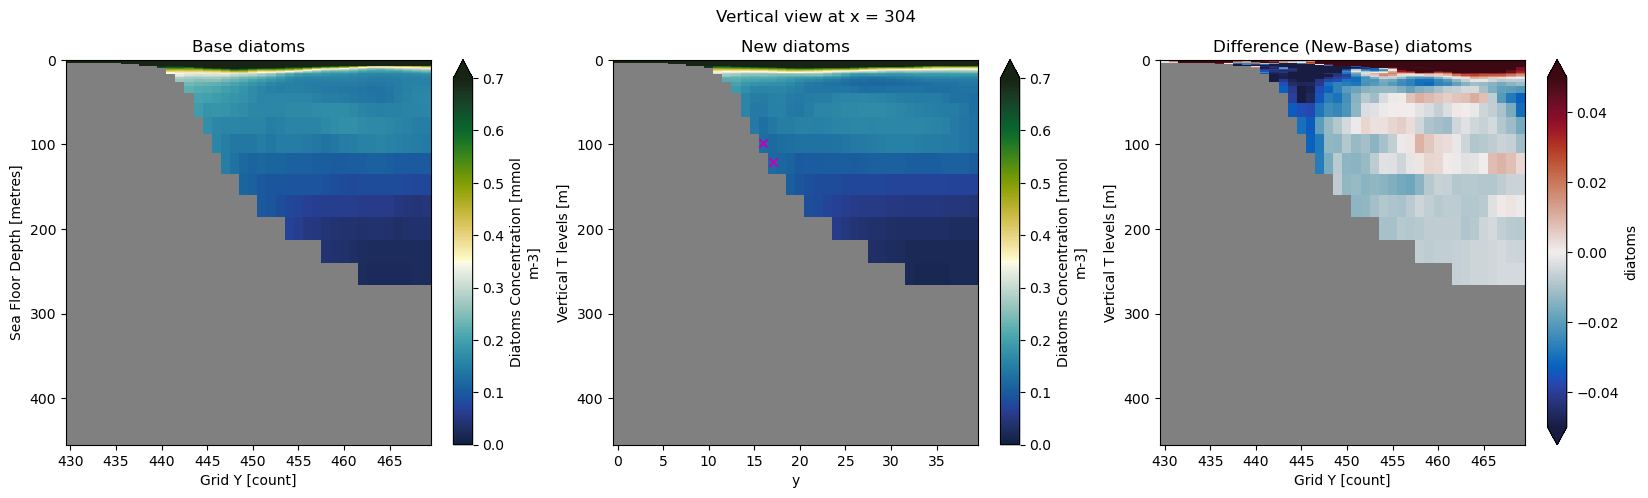

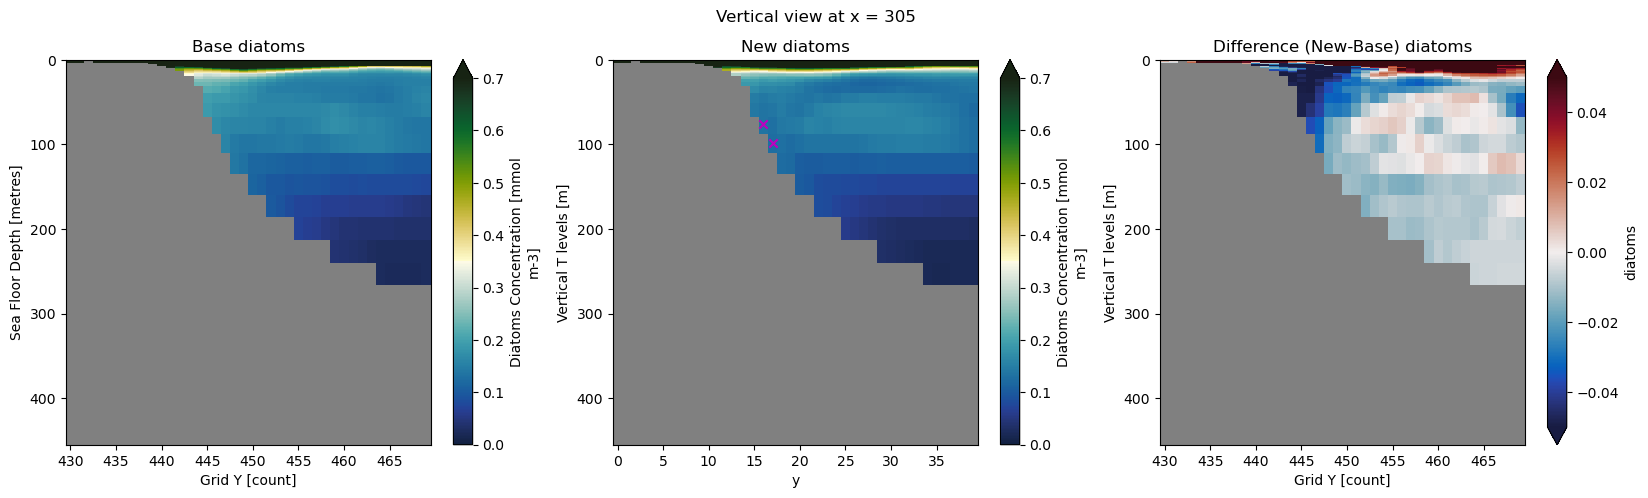

In [17]:
vertical_view_x(base_diatoms, new_diatoms, 'diatoms', 27, 304, cm_delta, 0.7, 0, 0.05)
vertical_view_x(base_diatoms, new_diatoms, 'diatoms', 27, 305, cm_delta, 0.7, 0, 0.05)

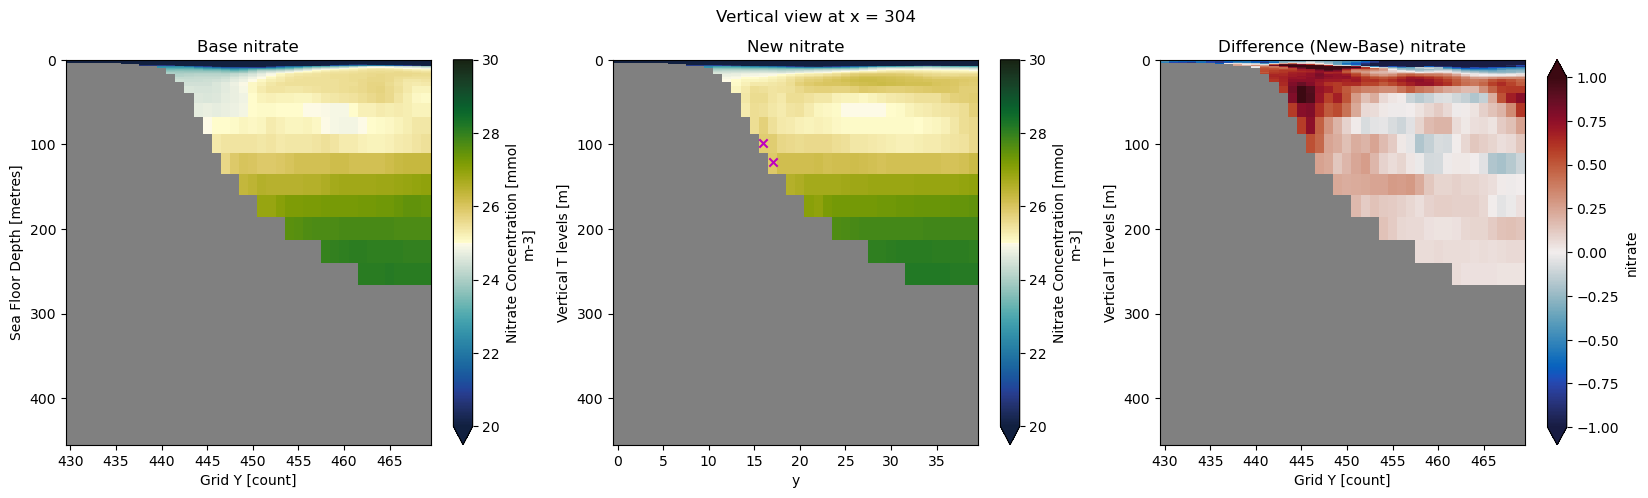

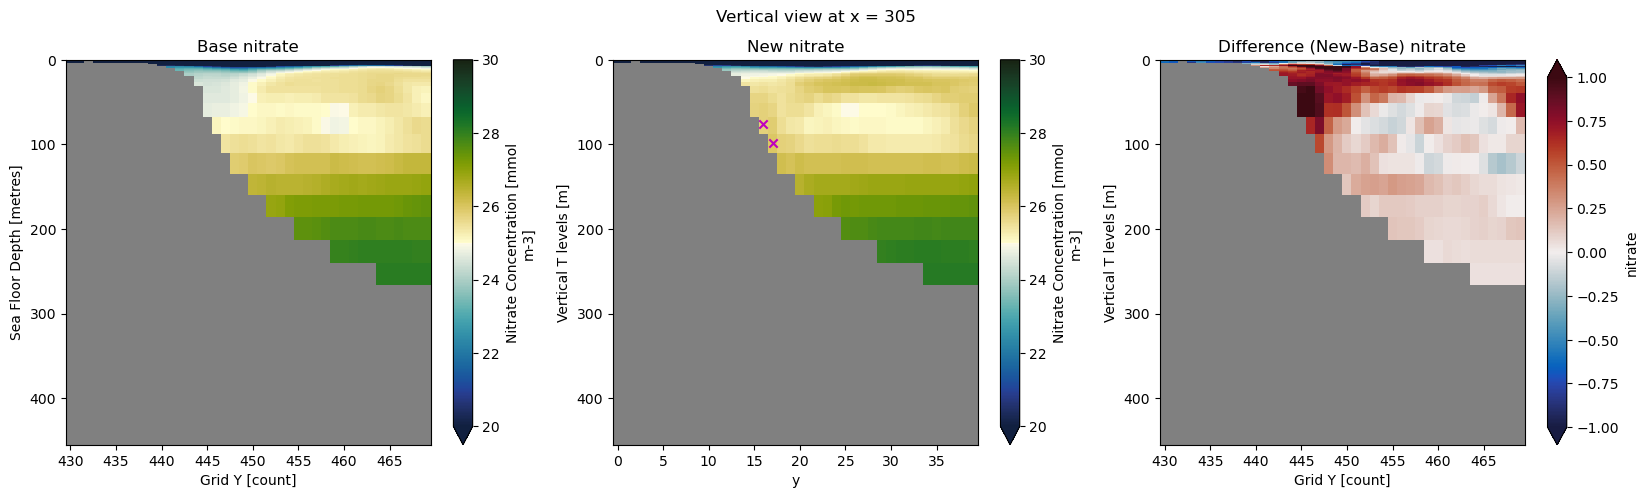

In [18]:
vertical_view_x(base_nitrate, new_nitrate, 'nitrate', 27, 304, cm_delta, 30, 20, 1)
vertical_view_x(base_nitrate, new_nitrate, 'nitrate', 27, 305, cm_delta, 30, 20, 1)

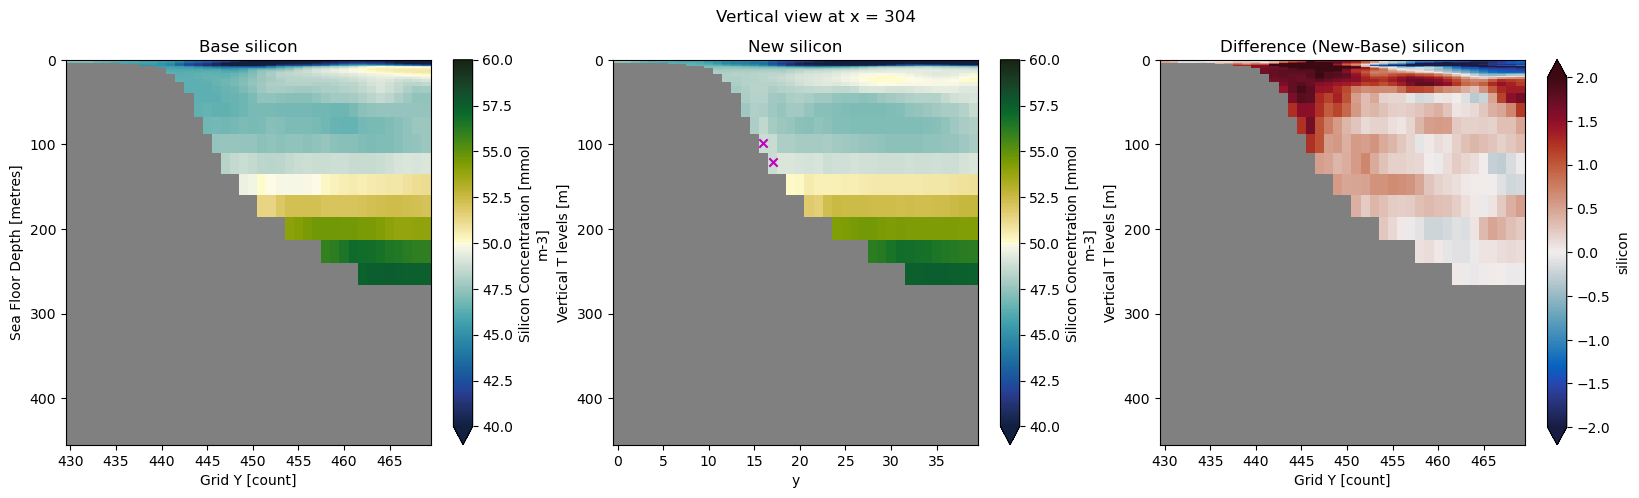

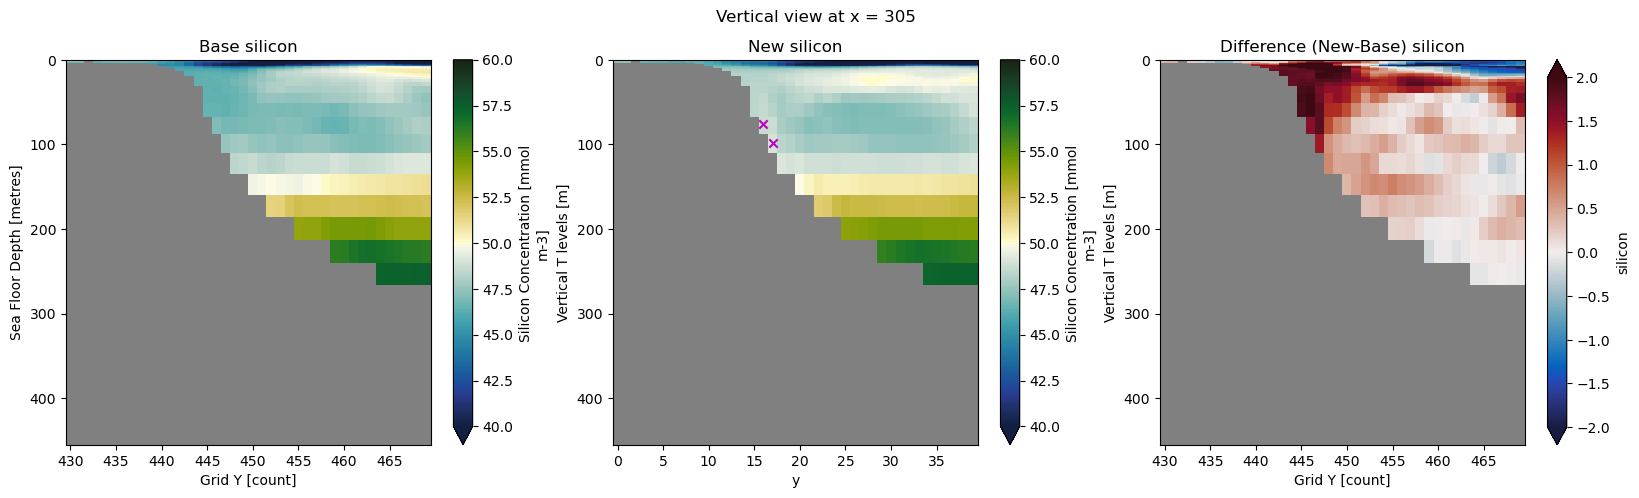

In [19]:
vertical_view_x(base_silicon, new_silicon, 'silicon', 27, 304, cm_delta, 60, 40, 2)
vertical_view_x(base_silicon, new_silicon, 'silicon', 27, 305, cm_delta, 60, 40, 2)

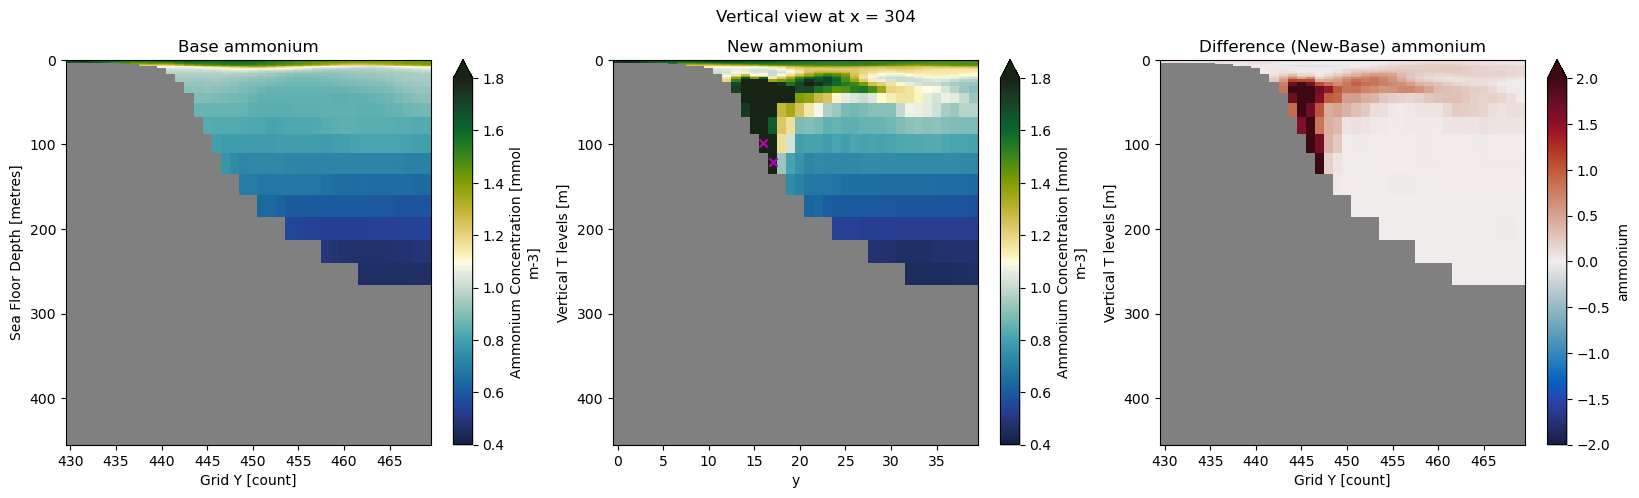

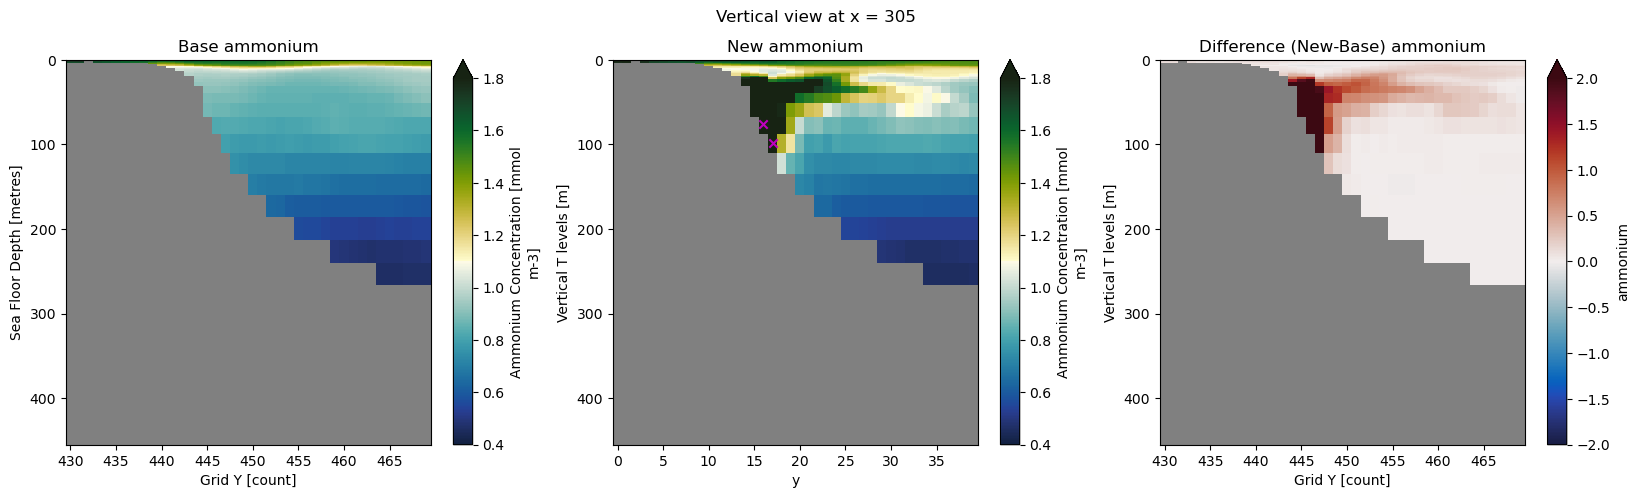

In [31]:
vertical_view_x(base_ammonium, new_ammonium, 'ammonium', 27, 304 , cm_delta, 1.8, 0.4, 2)
vertical_view_x(base_ammonium, new_ammonium, 'ammonium', 27, 305 , cm_delta, 1.8, 0.4, 2)

In [21]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

new_diatoms_slice = new_diatoms.isel(y = y_slice, x = x_slice)
new_nitrate_slice = new_nitrate.isel(y = y_slice, x = x_slice)
new_silicon_slice = new_silicon.isel(y = y_slice, x = x_slice)
new_ammonium_slice = new_ammonium.isel(y = y_slice, x = x_slice)

base_diatoms_slice = base_diatoms.isel(y = y_slice, x = x_slice)
base_nitrate_slice = base_nitrate.isel(y = y_slice, x = x_slice)
base_silicon_slice = base_silicon.isel(y = y_slice, x = x_slice)
base_ammonium_slice = base_ammonium.isel(y = y_slice, x = x_slice)

In [22]:
def plotAvgDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    
    diff_avg = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    diff_avg.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    max_depth = diff_avg.argmax(dim = 'deptht')
    #min_depth = diff_avg.argmin(dim='deptht') 
    axs.plot(diff_avg['time_counter'], diff_avg['deptht'][max_depth], 'r-')
    #axs.plot(diff_avg['time_counter'], diff_avg['deptht'][min_depth], 'b-')
    axs.set_title(f'Time Series for average difference in {field}')
    axs.set_ylim(150, 0)

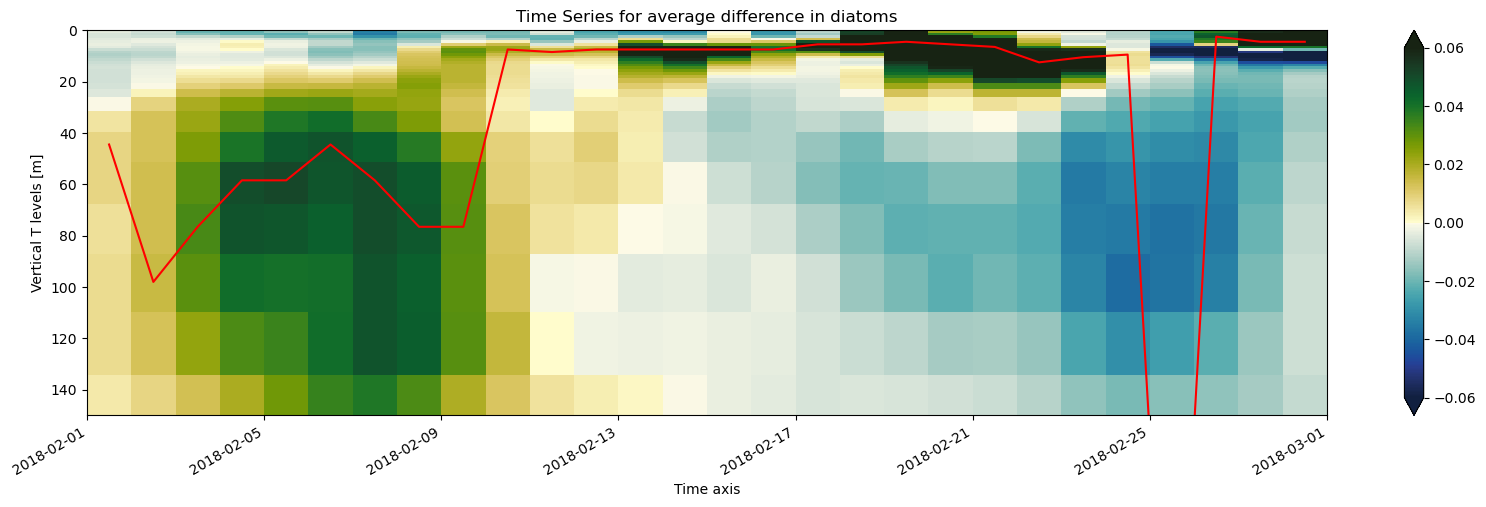

In [51]:
plotAvgDiffTime(base_diatoms_slice, new_diatoms_slice, 'diatoms', -0.06, 0.06, cm_delta)

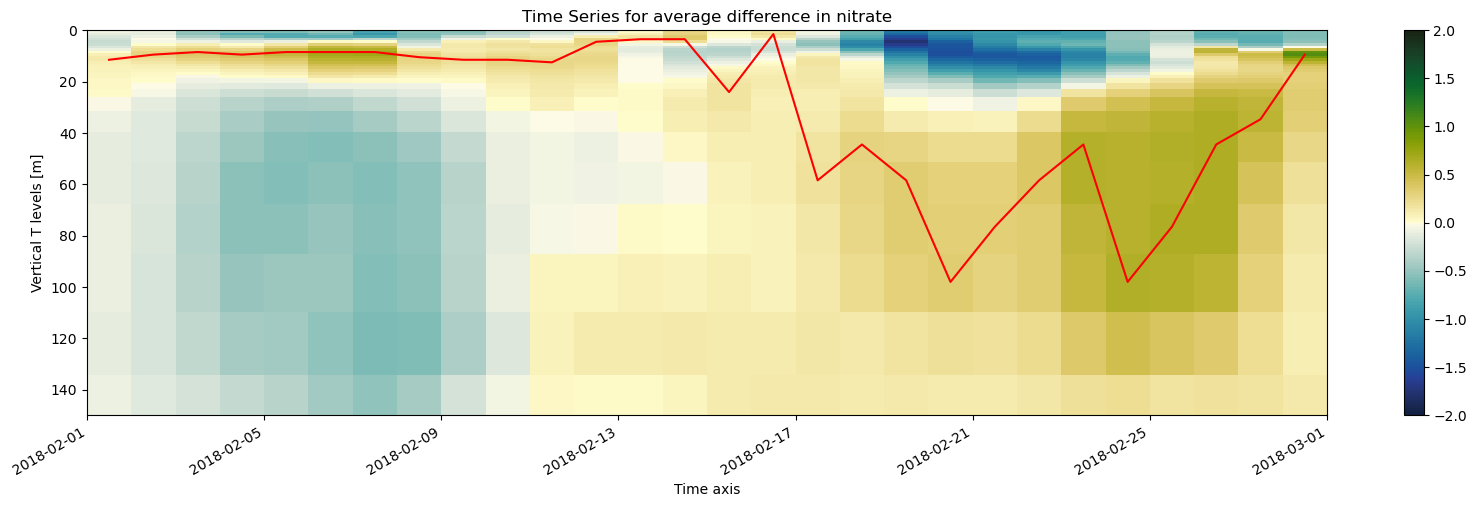

In [29]:
plotAvgDiffTime(base_nitrate_slice, new_nitrate_slice, 'nitrate', -2, 2, cm_delta)

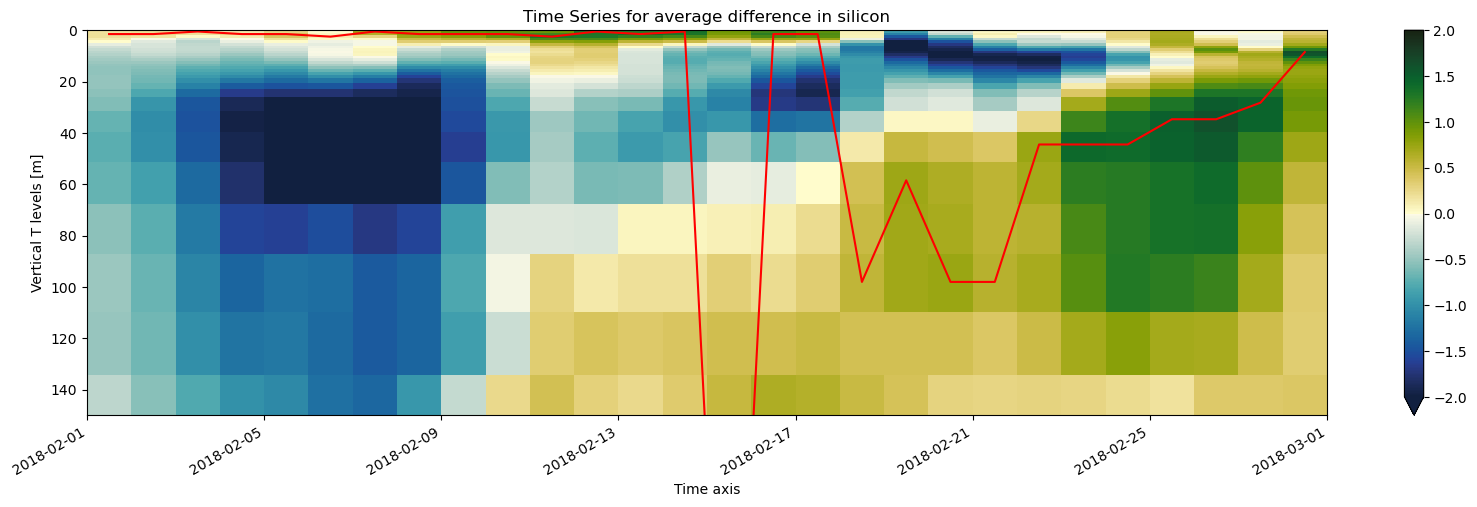

In [28]:
plotAvgDiffTime(base_silicon_slice, new_silicon_slice, 'silicon', -2, 2, cm_delta)

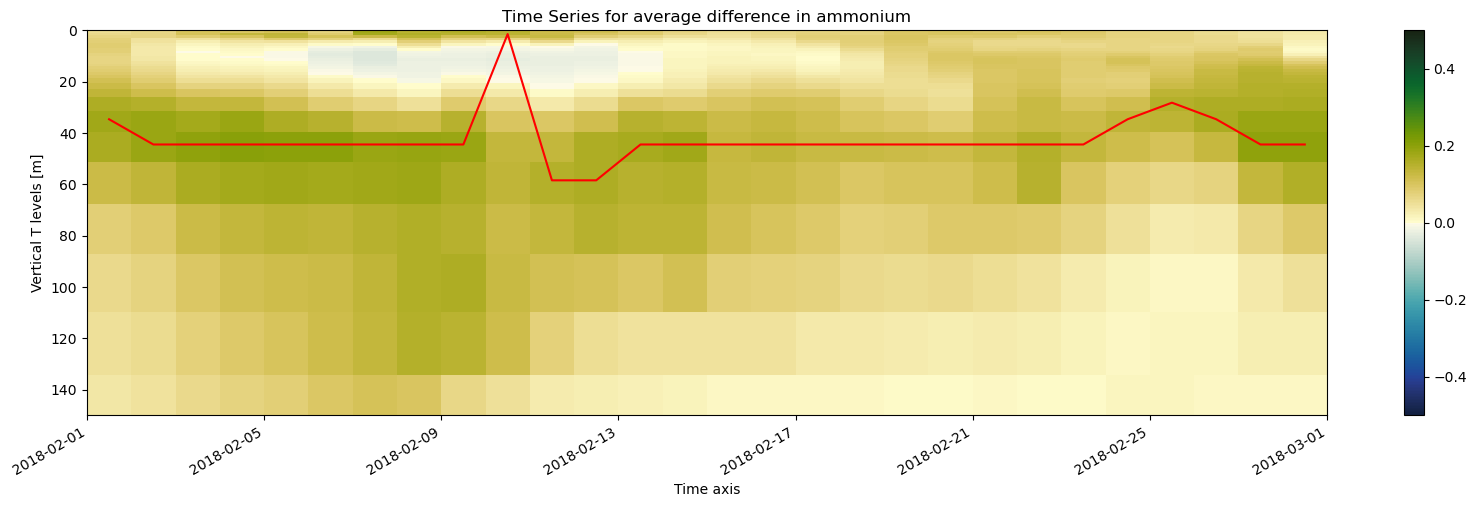

In [26]:
plotAvgDiffTime(base_ammonium_slice, new_ammonium_slice, 'ammonium', -0.5, 0.5, cm_delta)